In [ ]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from skimage import io
from skimage.color import rgb2gray
import os

# Loading the dataset
image_path = 'D:/Research Work under ABG/MIL gleason score work (60 days)/ML_models/colon_mix/'
image_names = os.listdir(image_path)  # Get a list of all image files in the directory
batch_size = 200  # Set the batch size

images = []
labels = []

# Process images in batches
for name in image_names[:batch_size]:  # Load the first 200 images
    image = io.imread(os.path.join(image_path, name))
    gray_image = rgb2gray(image)
    images.append(gray_image.flatten())
    if 'colonca' in name:
        labels.append(1)
    else:
        labels.append(0)

# Convert lists to NumPy arrays
X = np.array(images)
y = np.array(labels)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the SVM classifier
clf = svm.SVC(kernel='rbf')

# Training the classifier
clf.fit(X_train, y_train)

# Predicting the test set results
y_pred = clf.predict(X_test)

# Evaluating the classifier
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:/n', confusion_matrix(y_test, y_pred))


From here, the code for SVM implementation using each pixel as a feature

In [2]:
#importung packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

In [3]:
#import the dataset
path = os.listdir('D:/All_New/Colon_Dataset/Train')
classes = {'colon_noncancerous':0, 'colon_cancerous':1}

In [22]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'D:/All_New/Colon_Dataset/Train'+'/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0) #the "0" after +j is added to convert the image into grayscale or 2-D
        #img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [23]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)
np.unique(Y)

array([0, 1])

In [24]:
pd.Series(Y).value_counts()


0    500
1    500
Name: count, dtype: int64

In [25]:
X.shape, X_updated.shape

((1000, 768, 768), (1000, 589824))

(1000, 589824)

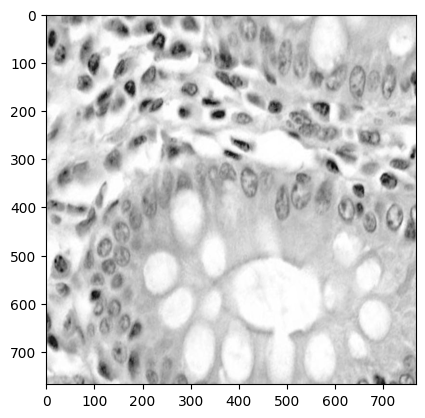

In [26]:
#visualizing data
plt.imshow(X[5], cmap='gray')
#preparing data
X_updated = X.reshape(len(X), -1)
X_updated.shape

In [27]:
#splitting data
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)
xtrain.shape, xtest.shape

((800, 589824), (200, 589824))

In [28]:
#feature scaling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [29]:
#feature selection
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(2)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
# pca_train = xtrain
# pca_test = xtest

(800, 589824) (200, 589824)


In [31]:
# print(pca_train.shape, pca_test.shape)
print(pca.n_components_)
print(pca.n_features_)

2
589824


In [32]:
#Training Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm

sv = svm.SVC(kernel='poly')
sv.fit(xtrain, ytrain)

SVC(kernel='poly')

In [33]:
#Evaluation
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.615


In [34]:
#Prediction
pred = sv.predict(xtest)
np.where(ytest!=pred)
misclassified=np.where(ytest!=pred)
misclassified


(array([  2,   5,   6,  14,  23,  24,  25,  26,  29,  35,  36,  38,  40,
         49,  53,  54,  56,  60,  61,  67,  68,  69,  70,  71,  72,  75,
         77,  83,  84,  86,  87,  91,  92,  95,  96,  97,  99, 101, 102,
        107, 109, 110, 111, 114, 116, 117, 122, 123, 128, 130, 131, 134,
        138, 143, 148, 151, 154, 160, 161, 162, 163, 165, 169, 171, 172,
        174, 177, 182, 184, 186, 189, 191, 193, 194, 196, 197, 198],
       dtype=int64),)

In [35]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[11],ytest[11])

Total Misclassified Samples:  77
0 0


In [36]:
#Testing Model
dec = {0:'Non-Cancerous', 1:'Cancerous'}

[1]
[1]
[0]
[1]


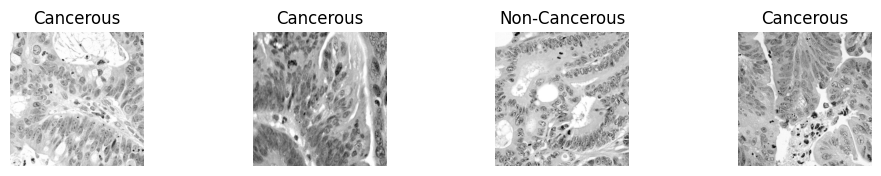

In [53]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/All_New/Colon_Dataset/Test/')
c=1
for i in os.listdir('D:/All_New/Colon_Dataset/Test/colon_cancerous/')[4:8]: #using dataset having cancerous data
    plt.subplot(4,4,c)
    
    img = cv2.imread('D:/All_New/Colon_Dataset/Test/colon_cancerous/'+i,0)
    img1 = cv2.resize(img, (256,256))
    img1 = img.reshape(1,-1)/255 #1 is row & -1 is 40,000 columns 255 is feature scaling
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    print(p)   #I'm using this for testing 50 images 
    c+=1
    

[0]
[0]
[0]
[0]


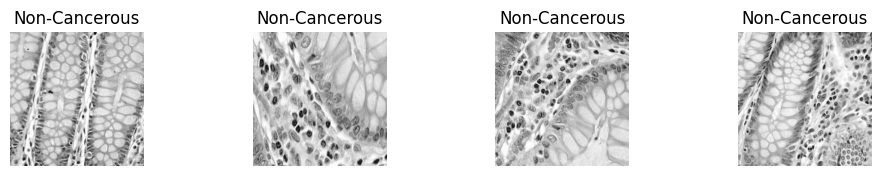

In [40]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/All_New/Colon_Dataset/Test/')
c=1
for i in os.listdir('D:/All_New/Colon_Dataset/Test/colon_noncancerous/')[4:8]: #using dataset having noncancerous data
    plt.subplot(4,4,c)
    
    img = cv2.imread('D:/All_New/Colon_Dataset/Test/colon_noncancerous/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    print(p)
    c+=1

This is has features explicitly defined

In [41]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.feature import local_binary_pattern
from sklearn.model_selection import KFold




In [42]:
# Define your dataset directory
dataset_dir = 'D:/All_New/Colon_Dataset/Train'

# Initialize empty lists for images and labels
images = []
labels = []

# Define a mapping of class labels to integers
class_to_int = {'colon_cancerous': 0, 'colon_noncancerous': 1}

In [43]:
# Loop through your dataset directory to load images and labels
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    for img_filename in os.listdir(category_dir):
        img_path = os.path.join(category_dir, img_filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (256, 256))  # Resize images to a common size
        images.append(img)  # Keep color images
        labels.append(class_to_int[category])  # Map class labels to integers

In [55]:
# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [54]:
#defining function to extract HOG features
def extract_hog_features(image):
    # Convert color image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = hog(image_gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
    return features


In [ ]:
# Define function to extract LBP features from an image
def extract_lbp_features(image):
    radius = 3
    n_points = 24
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp_image = local_binary_pattern(image_gray, n_points, radius, method='uniform')
    lbp_histogram, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_histogram = lbp_histogram / (lbp_histogram.sum() + 1e-6)  # Normalize
    return lbp_histogram

In [ ]:
# Apply the feature extraction functions to each image in the dataset
hog_features_train = np.array([extract_hog_features(img) for img in images])
lbp_features_train = np.array([extract_lbp_features(img) for img in images])
rgb_features_train = images.reshape(images.shape[0], -1)  # Flatten RGB images

In [ ]:
# Concatenate features from different methods
X_train = np.hstack((hog_features_train, lbp_features_train, rgb_features_train))
y_train = labels

In [ ]:
# Define the number of folds (k)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an SVM classifier with the "tanh" kernel
svm = SVC(kernel='poly', C=1)  # You can adjust the C value as needed

accuracies = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Fit the SVM model on the training data
    svm.fit(X_train_fold, y_train_fold)

    # Predict on the test data
    y_pred = svm.predict(X_test_fold)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracies.append(accuracy)

# Calculate the mean accuracy over all folds
mean_accuracy = np.mean(accuracies)

print(f'Mean Accuracy over {k}-fold cross-validation: {mean_accuracy:.2f}')


In [89]:


# Define the number of folds (k)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an SVM classifier
svm = SVC(kernel='sigmoid', C=1)  # You can adjust the kernel and C value

accuracies = []

# for train_index, test_index in kf.split(X_train):
#     X_train, X_test = X_train[train_index], X_train[test_index]
#     y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Fit the SVM model on the training data
svm.fit(X_train, y_train_fold)

    # Predict on the test data
y_pred = svm.predict(X_test)

    # Calculate accuracy for this fold
accuracy = accuracy_score(y_test_fold, y_pred)
accuracies.append(accuracy)

# Calculate the mean accuracy over all folds
mean_accuracy = np.mean(accuracies)

print(f'Mean Accuracy over {k}-fold cross-validation: {mean_accuracy:.2f}')


Mean Accuracy over 5-fold cross-validation: 0.38


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Create an SVM classifier
model_svm = SVC(kernel='poly', random_state=42, max_iter=1000)

# Fit the model to the training data
model_svm.fit(X_train, y_train)

In [51]:
# Make predictions on the test set
y_pred_svm = model_svm.predict(X_test)
print(y_pred_svm)

[0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 1 0]


In [52]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy with SVM:", accuracy_svm)

Accuracy with SVM: 0.675


In [53]:
# Calculate Precision and Recall with SVM
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
print("Precision with SVM:", precision_svm)
print("Recall with SVM:", recall_svm)

Precision with SVM: 0.7142857142857143
Recall with SVM: 0.5263157894736842


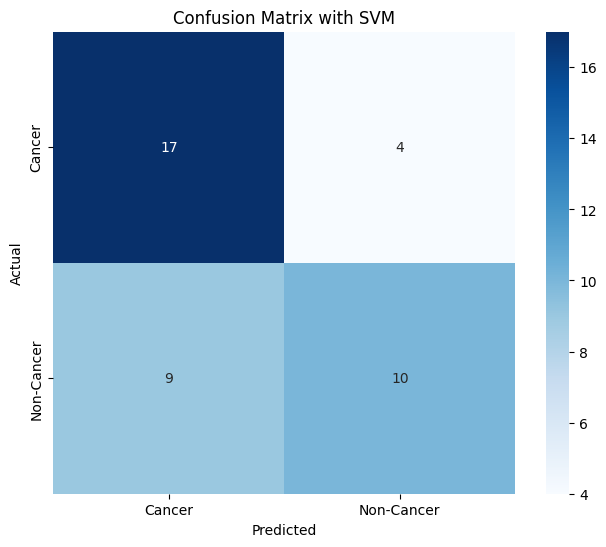

In [54]:
# Create a confusion matrix with SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_names = ['Cancer', 'Non-Cancer']  # Modify class names as needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", square=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with SVM')
plt.show()

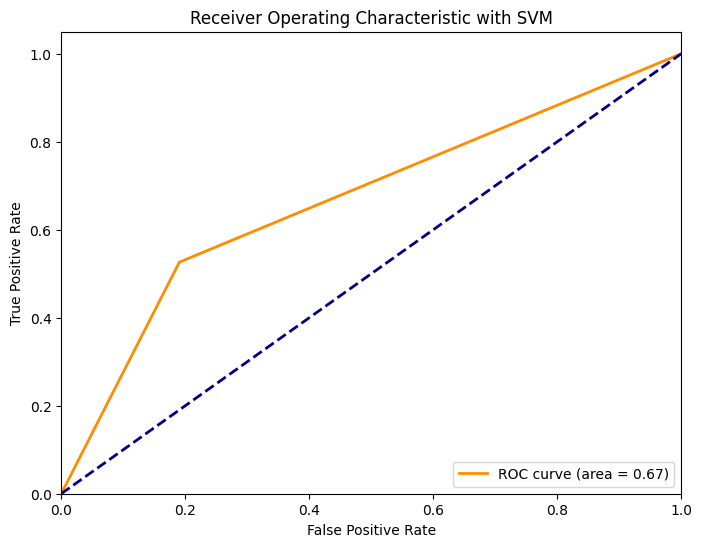

In [64]:
# Compute ROC curve and AUC with SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])    # hello guys this is an 
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')    # prototyp
plt.title('Receiver Operating Characteristic with SVM')
plt.legend(loc='lower right')
plt.show()

F1 Score with SVM: 0.6060606060606061


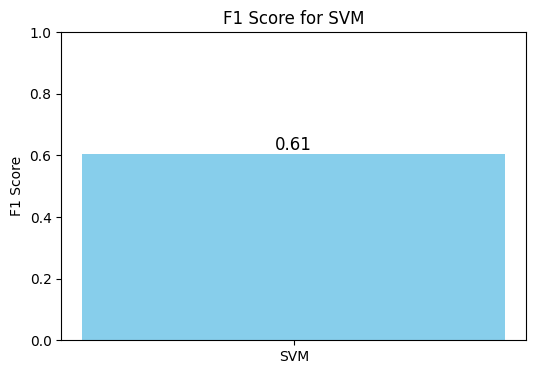

In [63]:
f1_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)

print("F1 Score with SVM:", f1_svm)

model_names = ['SVM']
f1_scores = [f1_svm]

plt.figure(figsize=(6, 4))
plt.bar(model_names, f1_scores, color='skyblue')
plt.ylabel('F1 Score')
plt.title('F1 Score for SVM')

# Display the F1 score value on top of the bar
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1, f'{f1:.2f}', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1)  # Set the y-axis limits to match the range of F1 score (0 to 1)
plt.show()




